<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/master/src/merge/merge_2_add_soil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import geopandas as gpd
import pandas as pd
import csv
import sys
import geopandas as gpd
import shapely
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
fire_landcover_elevation_path = '/content/drive/MyDrive/dm_fire_prediction/merge/fire_landcover_elevation.csv'
soil_path = '/content/drive/MyDrive/dm_fire_prediction/premerge/soil.csv'

In [5]:
df = pd.read_csv(fire_landcover_elevation_path)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head()

,longitude,latitude,fire,lcccode_label,elevation_ED_smoothed_by_mean,geometry
0,5.53337,35.70751,1,16.0,1787.5,POINT (5.53337 35.70751)
1,6.46961,32.13579,1,19.0,-280.0,POINT (6.46961 32.13579)
2,6.97630,32.35563,1,19.0,-280.0,POINT (6.9763 32.35563)
3,9.39581,28.19791,1,18.0,581.0,POINT (9.39581 28.19791)
4,9.49323,28.12826,1,18.0,581.0,POINT (9.49323 28.12826)


In [6]:
soil_df = pd.read_csv(soil_path)
soil_gdf = gpd.GeoDataFrame(soil_df, geometry=gpd.points_from_xy(soil_df.longitude, soil_df.latitude))
soil_gdf.head()

,latitude,longitude,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER,geometry
0,37.541655,8.948773,6.6,54.6,22.2,23.2,1.386,1.620,1.4092,5.94,...,11.4,79.6,2.4,1.4,0.0,1.0,0.6,12.0,C,POINT (8.94877 37.54166)
1,37.533318,8.915426,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,7.1,52.4,22.5,1.6,0.0,0.1,NaN,9.0,M,POINT (8.91543 37.53332)
2,37.533318,8.923763,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,7.1,52.4,22.5,1.6,0.0,0.1,NaN,9.0,M,POINT (8.92376 37.53332)
3,37.533318,8.932100,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,7.1,52.4,22.5,1.6,0.0,0.1,NaN,9.0,M,POINT (8.9321 37.53332)
4,37.533318,8.940436,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,7.1,52.4,22.5,1.6,0.0,0.1,NaN,9.0,M,POINT (8.94044 37.53332)


In [7]:
# Perform nearest-neighbor join
joined = gdf.sjoin_nearest(
    soil_gdf,
    how='left'
)

joined

,longitude_left,latitude_left,fire,lcccode_label,elevation_ED_smoothed_by_mean,geometry,index_right,latitude_right,longitude_right,COARSE,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
0,5.533370,35.707510,1,16.0,1787.5,POINT (5.53337 35.70751),171557,35.707501,5.530728,13.50,...,29.0,24.00,81.5,0.0,3.0,4.900000,1.20,1.0,5.0,M
1,6.469610,32.135790,1,19.0,-280.0,POINT (6.46961 32.13579),813308,32.139236,6.472775,9.00,...,37.0,37.00,99.0,0.0,4.0,9.300000,3.30,1.0,11.0,M
2,6.976300,32.355630,1,19.0,-280.0,POINT (6.9763 32.35563),774457,32.356000,6.972976,3.85,...,12.6,11.85,45.0,NaN,NaN,1.360000,NaN,NaN,11.0,M
3,9.395810,28.197910,1,18.0,581.0,POINT (9.39581 28.19791),1691995,28.195803,9.398955,12.00,...,30.0,30.00,100.0,0.0,3.0,8.000000,4.00,1.0,11.0,M
4,9.493230,28.128260,1,18.0,581.0,POINT (9.49323 28.12826),1709803,28.129107,9.490658,12.00,...,30.0,30.00,100.0,0.0,3.0,8.000000,4.00,1.0,11.0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965252,9.825798,37.320199,0,1.0,-280.0,POINT (9.8258 37.3202),92,37.316555,9.824126,15.30,...,23.3,23.30,92.8,1.8,4.1,19.109999,0.24,NaN,12.0,C
1965253,9.834781,37.320199,0,1.0,-280.0,POINT (9.83478 37.3202),93,37.316555,9.832463,15.30,...,23.3,23.30,92.8,1.8,4.1,19.109999,0.24,NaN,12.0,C
1965254,9.843764,37.320199,0,1.0,-280.0,POINT (9.84376 37.3202),94,37.316555,9.840799,15.30,...,23.3,23.30,92.8,1.8,4.1,19.109999,0.24,NaN,12.0,C
1965255,9.852747,37.320199,0,1.0,-280.0,POINT (9.85275 37.3202),95,37.316555,9.849136,15.30,...,23.3,23.30,92.8,1.8,4.1,19.109999,0.24,NaN,12.0,C


<Axes: xlabel='longitude_left', ylabel='latitude_left'>

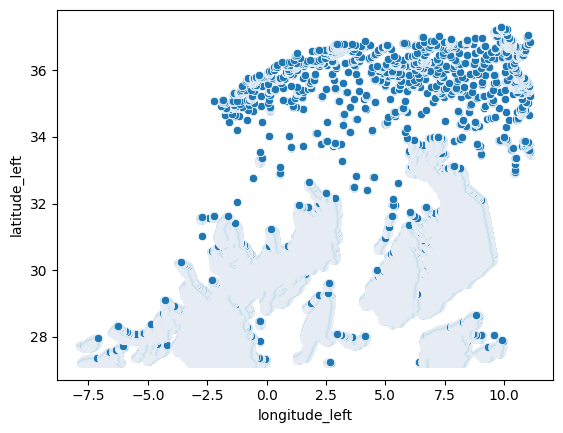

In [13]:
sns.scatterplot(joined[joined['COARSE'].isna()], x='longitude_left', y='latitude_left')

In [14]:
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1965257 entries, 0 to 1965256
Data columns (total 31 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   longitude_left                 float64 
 1   latitude_left                  float64 
 2   fire                           int64   
 3   lcccode_label                  float64 
 4   elevation_ED_smoothed_by_mean  float64 
 5   geometry                       geometry
 6   index_right                    int64   
 7   latitude_right                 float64 
 8   longitude_right                float64 
 9   COARSE                         float64 
 10  SAND                           float64 
 11  SILT                           float64 
 12  CLAY                           float64 
 13  BULK                           float64 
 14  REF_BULK                       float64 
 15  ORG_CARBON                     float64 
 16  PH_WATER                       float64 
 17  TOTAL_N                 

In [20]:
joined.rename({'longitude_right': 'longitude_soil',
              'latitude_right': 'latitude_soil'}, axis=1, inplace=True)
joined.head()

,longitude_left,latitude_left,fire,lcccode_label,elevation_ED_smoothed_by_mean,latitude_soil,longitude_soil,COARSE,SAND,SILT,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
0,5.53337,35.70751,1,16.0,1787.5,35.707501,5.530728,13.50,41.0,34.5,...,29.0,24.00,81.5,0.0,3.0,4.90,1.2,1.0,5.0,M
1,6.46961,32.13579,1,19.0,-280.0,32.139236,6.472775,9.00,55.0,30.0,...,37.0,37.00,99.0,0.0,4.0,9.30,3.3,1.0,11.0,M
2,6.97630,32.35563,1,19.0,-280.0,32.356000,6.972976,3.85,27.4,11.1,...,12.6,11.85,45.0,NaN,NaN,1.36,NaN,NaN,11.0,M
3,9.39581,28.19791,1,18.0,581.0,28.195803,9.398955,12.00,57.0,27.0,...,30.0,30.00,100.0,0.0,3.0,8.00,4.0,1.0,11.0,M
4,9.49323,28.12826,1,18.0,581.0,28.129107,9.490658,12.00,57.0,27.0,...,30.0,30.00,100.0,0.0,3.0,8.00,4.0,1.0,11.0,M


In [18]:
joined.drop(columns=['geometry', 'index_right'], inplace=True)
joined.head()

,longitude_left,latitude_left,fire,lcccode_label,elevation_ED_smoothed_by_mean,latitude_right,longitude_right,COARSE,SAND,SILT,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
0,5.53337,35.70751,1,16.0,1787.5,35.707501,5.530728,13.50,41.0,34.5,...,29.0,24.00,81.5,0.0,3.0,4.90,1.2,1.0,5.0,M
1,6.46961,32.13579,1,19.0,-280.0,32.139236,6.472775,9.00,55.0,30.0,...,37.0,37.00,99.0,0.0,4.0,9.30,3.3,1.0,11.0,M
2,6.97630,32.35563,1,19.0,-280.0,32.356000,6.972976,3.85,27.4,11.1,...,12.6,11.85,45.0,NaN,NaN,1.36,NaN,NaN,11.0,M
3,9.39581,28.19791,1,18.0,581.0,28.195803,9.398955,12.00,57.0,27.0,...,30.0,30.00,100.0,0.0,3.0,8.00,4.0,1.0,11.0,M
4,9.49323,28.12826,1,18.0,581.0,28.129107,9.490658,12.00,57.0,27.0,...,30.0,30.00,100.0,0.0,3.0,8.00,4.0,1.0,11.0,M


In [21]:
joined.rename({'longitude_left': 'longitude',
              'latitude_left': 'latitude'}, axis=1, inplace=True)
joined.head()

,longitude,latitude,fire,lcccode_label,elevation_ED_smoothed_by_mean,latitude_soil,longitude_soil,COARSE,SAND,SILT,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
0,5.53337,35.70751,1,16.0,1787.5,35.707501,5.530728,13.50,41.0,34.5,...,29.0,24.00,81.5,0.0,3.0,4.90,1.2,1.0,5.0,M
1,6.46961,32.13579,1,19.0,-280.0,32.139236,6.472775,9.00,55.0,30.0,...,37.0,37.00,99.0,0.0,4.0,9.30,3.3,1.0,11.0,M
2,6.97630,32.35563,1,19.0,-280.0,32.356000,6.972976,3.85,27.4,11.1,...,12.6,11.85,45.0,NaN,NaN,1.36,NaN,NaN,11.0,M
3,9.39581,28.19791,1,18.0,581.0,28.195803,9.398955,12.00,57.0,27.0,...,30.0,30.00,100.0,0.0,3.0,8.00,4.0,1.0,11.0,M
4,9.49323,28.12826,1,18.0,581.0,28.129107,9.490658,12.00,57.0,27.0,...,30.0,30.00,100.0,0.0,3.0,8.00,4.0,1.0,11.0,M


## Saving the Output

In [22]:
output_path = '/content/drive/MyDrive/dm_fire_prediction/merge/fire_landcover_elevation_soil.csv'

joined.to_csv(output_path, index=False)